<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Other-Clustering-Methods" data-toc-modified-id="Other-Clustering-Methods-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Other Clustering Methods</a></span><ul class="toc-item"><li><span><a href="#Recapitulando---Blobs-&amp;-K-Means" data-toc-modified-id="Recapitulando---Blobs-&amp;-K-Means-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Recapitulando - Blobs &amp; K-Means</a></span></li><li><span><a href="#Blobs-esticados,-e-KMeans?" data-toc-modified-id="Blobs-esticados,-e-KMeans?-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Blobs esticados, e KMeans?</a></span><ul class="toc-item"><li><span><a href="#Solução---GMM!" data-toc-modified-id="Solução---GMM!-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Solução - GMM!</a></span></li></ul></li><li><span><a href="#Algoritmos-bottom-up" data-toc-modified-id="Algoritmos-bottom-up-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Algoritmos bottom-up</a></span><ul class="toc-item"><li><span><a href="#Clusterização-hierarquica" data-toc-modified-id="Clusterização-hierarquica-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Clusterização hierarquica</a></span></li><li><span><a href="#DBSCAN" data-toc-modified-id="DBSCAN-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>DBSCAN</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_classification, make_circles
from yellowbrick.cluster import KElbowVisualizer

# Other Clustering Methods

## Recapitulando - Blobs & K-Means

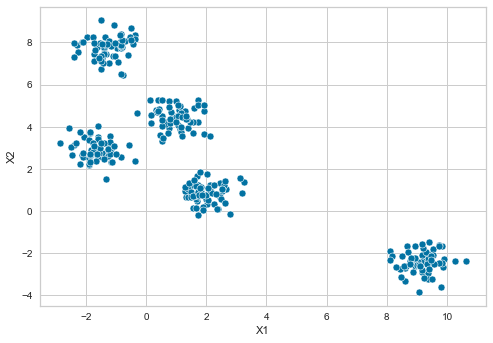

In [2]:
X, y_true = make_blobs(n_samples=300, centers=5,
                       cluster_std=0.5, random_state=0)
tb_blob = pd.DataFrame(X, columns = ['X1', 'X2'])
sns.scatterplot(data = tb_blob, x = 'X1', y = 'X2');

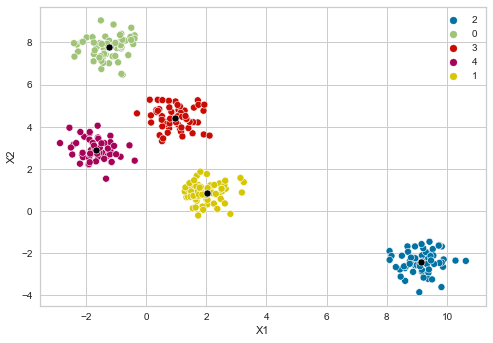

In [3]:
km_fit = KMeans(n_clusters = 5).fit(tb_blob[['X1', 'X2']])

tb_blob['clu_kmeans'] = [str(label) for label in km_fit.labels_]
tb_centroid = pd.DataFrame(km_fit.cluster_centers_, columns = ['X1', 'X2'])

sns.scatterplot(data = tb_blob, x = 'X1', y = 'X2', hue = 'clu_kmeans');
sns.scatterplot(data = tb_centroid, x = 'X1', y = 'X2', color = 'black');

## Blobs esticados, e KMeans?

In [4]:
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))
tb_sblob = pd.DataFrame(X_stretched, columns = ['X1', 'X2'])

<AxesSubplot:xlabel='X1', ylabel='X2'>

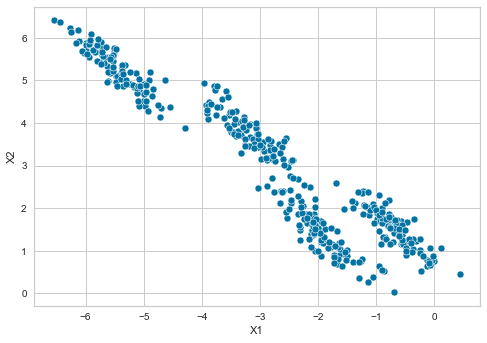

In [5]:
sns.scatterplot(data = tb_sblob, x = 'X1', y = 'X2')

<AxesSubplot:xlabel='X2', ylabel='Density'>

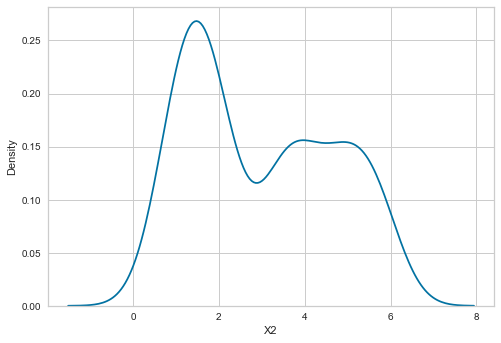

In [8]:
sns.kdeplot(data = tb_sblob, x = 'X2')

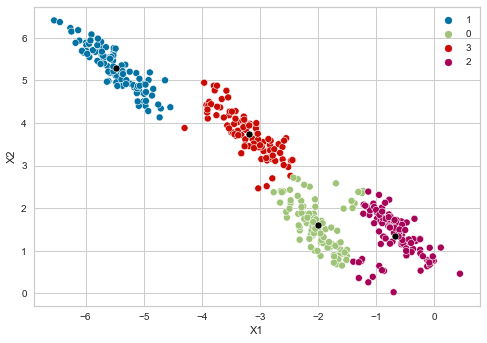

In [9]:
km_fit = KMeans(n_clusters = 4).fit(tb_sblob[['X1', 'X2']])

tb_sblob['clu_kmeans'] = [str(label) for label in km_fit.labels_]
tb_centroid = pd.DataFrame(km_fit.cluster_centers_, columns = ['X1', 'X2'])

sns.scatterplot(data = tb_sblob, x = 'X1', y = 'X2', hue = 'clu_kmeans');
sns.scatterplot(data = tb_centroid, x = 'X1', y = 'X2', color = 'black');

### Solução - GMM!
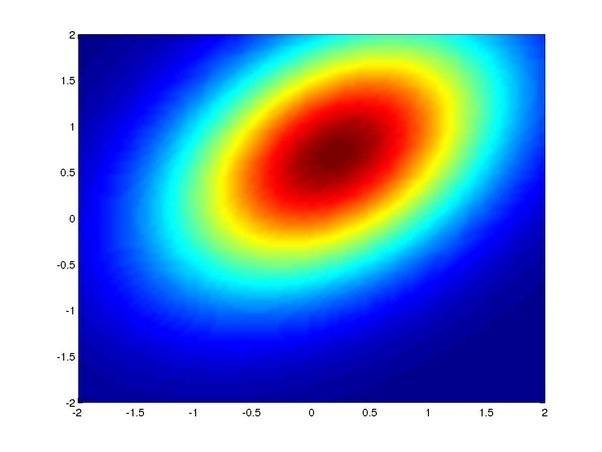

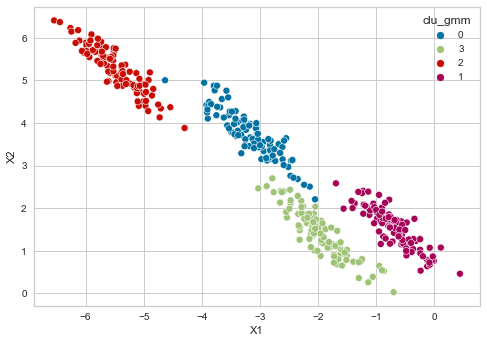

In [71]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)
gmm.fit(tb_sblob[['X1', 'X2']])

tb_sblob['clu_gmm'] = [str(x) for x in gmm.predict(tb_sblob[['X1', 'X2']])]

sns.scatterplot(data = tb_sblob, x = 'X1', y = 'X2', hue = 'clu_gmm');

In [72]:
gmm.predict(tb_sblob[['X1', 'X2']])

array([0, 3, 3, 0, 3, 2, 1, 0, 3, 1, 2, 1, 0, 3, 3, 1, 3, 1, 0, 3, 3, 3,
       2, 0, 0, 2, 2, 0, 0, 1, 0, 0, 3, 0, 3, 2, 1, 0, 1, 0, 3, 2, 1, 0,
       1, 2, 1, 1, 1, 2, 2, 2, 3, 2, 2, 3, 0, 1, 1, 3, 1, 1, 1, 1, 0, 3,
       1, 0, 3, 2, 3, 0, 3, 2, 1, 3, 0, 3, 2, 3, 3, 0, 1, 2, 0, 3, 3, 0,
       3, 1, 3, 1, 0, 3, 3, 2, 0, 1, 1, 1, 2, 1, 0, 0, 3, 2, 0, 2, 1, 3,
       3, 3, 0, 3, 2, 1, 2, 3, 2, 2, 1, 3, 1, 2, 0, 2, 1, 1, 1, 0, 2, 2,
       2, 3, 0, 3, 2, 0, 2, 3, 0, 3, 3, 2, 3, 1, 0, 3, 1, 3, 1, 0, 1, 0,
       2, 3, 1, 3, 3, 3, 0, 3, 2, 3, 3, 2, 1, 1, 3, 2, 2, 2, 2, 1, 1, 1,
       0, 3, 0, 2, 0, 2, 3, 0, 2, 3, 2, 0, 0, 2, 0, 0, 2, 3, 2, 2, 2, 1,
       1, 0, 0, 3, 1, 1, 2, 0, 3, 2, 0, 2, 0, 0, 1, 1, 2, 1, 0, 2, 1, 2,
       3, 0, 2, 3, 3, 3, 1, 2, 0, 2, 0, 3, 0, 0, 2, 1, 3, 1, 0, 3, 1, 0,
       0, 2, 1, 0, 2, 0, 1, 3, 3, 1, 3, 0, 2, 2, 0, 0, 1, 2, 0, 3, 3, 3,
       2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 3, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2,
       1, 0, 1, 0, 1, 3, 0, 1, 3, 0, 1, 1, 0, 3, 2,

In [73]:
gmm.predict_proba(tb_sblob[['X1', 'X2']])

array([[5.75274423e-01, 1.58887072e-22, 4.24725314e-01, 2.62552260e-07],
       [1.00239526e-09, 4.54857982e-15, 1.90679437e-17, 9.99999999e-01],
       [2.23934990e-09, 2.93987271e-17, 2.34056362e-14, 9.99999998e-01],
       ...,
       [5.79341845e-08, 9.99999921e-01, 1.08031641e-36, 2.08509026e-08],
       [5.48891807e-01, 3.69501952e-04, 2.07942840e-15, 4.50738691e-01],
       [1.73628509e-11, 1.00000000e+00, 3.76078167e-47, 5.86405894e-14]])

In [74]:
tb_sblob_gmm = pd.concat([
    pd.DataFrame(gmm.predict_proba(tb_sblob[['X1', 'X2']]),
                 columns=['c0', 'c1', 'c2', 'c3']), tb_sblob
],
                         axis=1)

In [75]:
tb_sblob_gmm.head()

,c0,c1,c2,c3,X1,X2,clu_kmeans,clu_gmm
0,5.752744e-01,1.588871e-22,4.247253e-01,2.625523e-07,-4.633309,5.003620,1,0
1,1.002395e-09,4.548580e-15,1.906794e-17,1.000000e+00,-1.676543,0.681975,0,3
2,2.239350e-09,2.939873e-17,2.340564e-14,1.000000e+00,-2.057103,1.002848,0,3
3,9.999117e-01,4.852889e-10,4.019711e-11,8.833625e-05,-3.104733,3.569557,3,0
4,1.848972e-09,5.111685e-14,3.666395e-18,1.000000e+00,-1.585852,0.651724,0,3


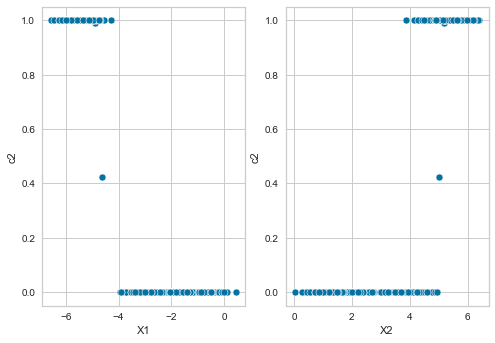

In [76]:
fig, ax = plt.subplots(1, 2)
sns.scatterplot(data = tb_sblob_gmm, x = 'X1', y = 'c2', ax = ax[0]);
sns.scatterplot(data = tb_sblob_gmm, x = 'X2', y = 'c2', ax = ax[1]);

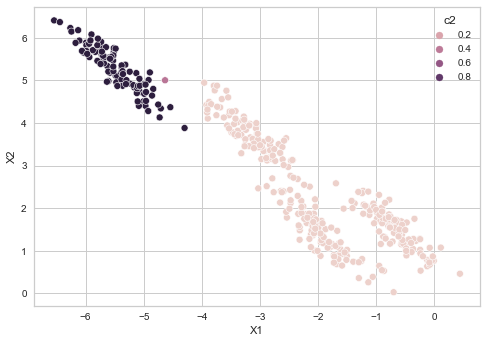

In [77]:
sns.scatterplot(data = tb_sblob_gmm, x = 'X1', y = 'X2', hue = 'c2');

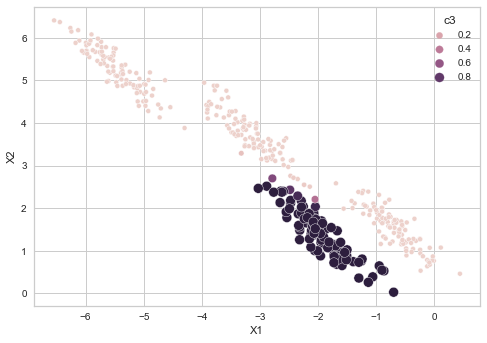

In [78]:
sns.scatterplot(data = tb_sblob_gmm, x = 'X1', y = 'X2', size = 'c3', hue = 'c3');

In [79]:
tb_sblob_gmm.shape

(400, 8)

In [80]:
gmm.predict_proba(tb_sblob[['X1', 'X2']])

array([[5.75274423e-01, 1.58887072e-22, 4.24725314e-01, 2.62552260e-07],
       [1.00239526e-09, 4.54857982e-15, 1.90679437e-17, 9.99999999e-01],
       [2.23934990e-09, 2.93987271e-17, 2.34056362e-14, 9.99999998e-01],
       ...,
       [5.79341845e-08, 9.99999921e-01, 1.08031641e-36, 2.08509026e-08],
       [5.48891807e-01, 3.69501952e-04, 2.07942840e-15, 4.50738691e-01],
       [1.73628509e-11, 1.00000000e+00, 3.76078167e-47, 5.86405894e-14]])

In [81]:
tb_sblob_gmm['certeza'] = np.max(gmm.predict_proba(tb_sblob[['X1', 'X2']]), axis=1)

In [82]:
tb_sblob_gmm

,c0,c1,c2,c3,X1,X2,clu_kmeans,clu_gmm,certeza
0,5.752744e-01,1.588871e-22,4.247253e-01,2.625523e-07,-4.633309,5.003620,1,0,0.575274
1,1.002395e-09,4.548580e-15,1.906794e-17,1.000000e+00,-1.676543,0.681975,0,3,1.000000
2,2.239350e-09,2.939873e-17,2.340564e-14,1.000000e+00,-2.057103,1.002848,0,3,1.000000
3,9.999117e-01,4.852889e-10,4.019711e-11,8.833625e-05,-3.104733,3.569557,3,0,0.999912
4,1.848972e-09,5.111685e-14,3.666395e-18,1.000000e+00,-1.585852,0.651724,0,3,1.000000
...,...,...,...,...,...,...,...,...,...
395,9.997010e-01,5.049940e-13,1.660391e-07,2.987857e-04,-3.437613,3.734812,3,0,0.999701
396,9.997964e-01,2.087653e-12,2.754556e-08,2.035883e-04,-3.373146,3.713029,3,0,0.999796
397,5.793418e-08,9.999999e-01,1.080316e-36,2.085090e-08,-0.482066,0.996070,2,1,1.000000
398,5.488918e-01,3.695020e-04,2.079428e-15,4.507387e-01,-2.051116,2.207007,0,0,0.548892


In [83]:
tb_sblob_gmm['incerteza'] = 1 - np.max(gmm.predict_proba(tb_sblob[['X1', 'X2']]), axis=1)

In [84]:
tb_sblob_gmm

,c0,c1,c2,c3,X1,X2,clu_kmeans,clu_gmm,certeza,incerteza
0,5.752744e-01,1.588871e-22,4.247253e-01,2.625523e-07,-4.633309,5.003620,1,0,0.575274,4.247256e-01
1,1.002395e-09,4.548580e-15,1.906794e-17,1.000000e+00,-1.676543,0.681975,0,3,1.000000,1.002400e-09
2,2.239350e-09,2.939873e-17,2.340564e-14,1.000000e+00,-2.057103,1.002848,0,3,1.000000,2.239373e-09
3,9.999117e-01,4.852889e-10,4.019711e-11,8.833625e-05,-3.104733,3.569557,3,0,0.999912,8.833678e-05
4,1.848972e-09,5.111685e-14,3.666395e-18,1.000000e+00,-1.585852,0.651724,0,3,1.000000,1.849023e-09
...,...,...,...,...,...,...,...,...,...,...
395,9.997010e-01,5.049940e-13,1.660391e-07,2.987857e-04,-3.437613,3.734812,3,0,0.999701,2.989518e-04
396,9.997964e-01,2.087653e-12,2.754556e-08,2.035883e-04,-3.373146,3.713029,3,0,0.999796,2.036158e-04
397,5.793418e-08,9.999999e-01,1.080316e-36,2.085090e-08,-0.482066,0.996070,2,1,1.000000,7.878509e-08
398,5.488918e-01,3.695020e-04,2.079428e-15,4.507387e-01,-2.051116,2.207007,0,0,0.548892,4.511082e-01


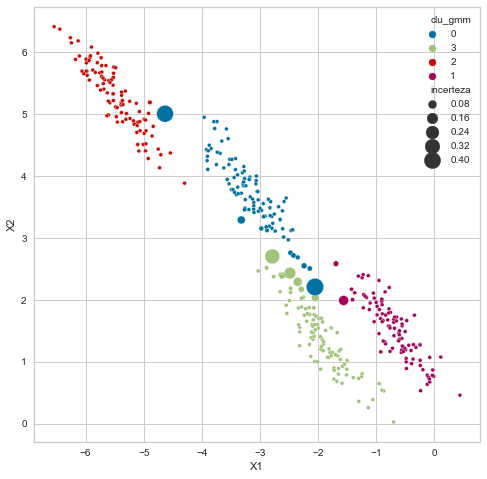

In [85]:
fig, ax = plt.subplots(figsize = (8,8))
sns.scatterplot(data = tb_sblob_gmm, x = 'X1', y = 'X2', hue = 'clu_gmm', size = 'incerteza', sizes = (15, 300));

<AxesSubplot:xlabel='incerteza'>

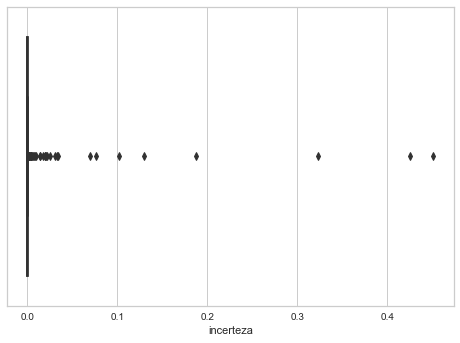

In [86]:
sns.boxplot(data = tb_sblob_gmm, x = 'incerteza')

In [87]:
tb_sblob_gmm[tb_sblob_gmm['incerteza'] > 0.1]

,c0,c1,c2,c3,X1,X2,clu_kmeans,clu_gmm,certeza,incerteza
0,0.575274,1.588871e-22,4.247253e-01,2.625523e-07,-4.633309,5.003620,1,0,0.575274,0.424726
120,0.123691,8.700426e-01,6.130664e-22,6.266431e-03,-1.559165,1.988418,0,1,0.870043,0.129957
224,0.187205,3.555437e-08,2.872664e-11,8.127951e-01,-2.482190,2.430639,0,3,0.812795,0.187205
353,0.102225,1.358110e-07,2.658694e-12,8.977753e-01,-2.349566,2.288819,0,3,0.897775,0.102225
385,0.323299,3.976012e-10,8.235741e-09,6.767014e-01,-2.786318,2.699280,3,3,0.676701,0.323299
398,0.548892,3.695020e-04,2.079428e-15,4.507387e-01,-2.051116,2.207007,0,0,0.548892,0.451108


## Algoritmos bottom-up

### Clusterização hierarquica

- <b>Maximum or complete linkage</b> minimizes the maximum distance between observations of pairs of clusters: 
    - Compute all pairwise distances between observations in cluster A and in cluster B, and record the largest of these distances.
    

- <b>Average linkage</b> minimizes the average of the distances between all observations of pairs of clusters.
    - Compute all pairwise distance between the observations in cluster A and cluster B and record the average of these distances.

- <b>Single linkage</b> minimizes the distance between the closest observations of pairs of clusters.
    - Compute all pairwise distance between the observations in clusterA and cluster B and record the smallest of these distances.
- <b> Ward </b> minimizes the error sum of squares (also known as variance)

In [88]:
tb_mall = pd.read_csv('data/Mall_Customers.csv')
tb_mall.columns = ['cid', 'genre', 'age', 'income', 'spend']

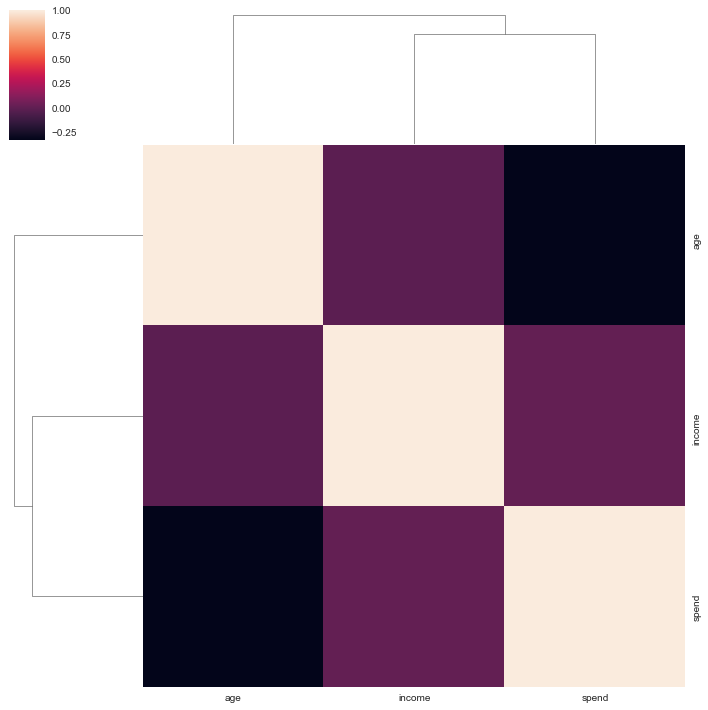

In [ ]:
tb_mall.head()

In [94]:
X = tb_mall[['age', 'income', 'spend']]
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)
tb_mall_std = pd.DataFrame(X_std, columns = ['age', 'income', 'spend'])

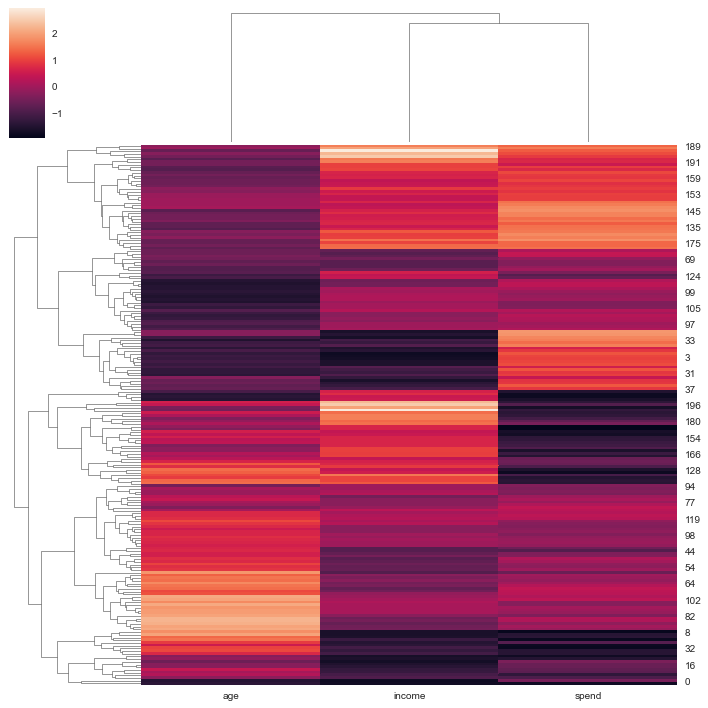

In [99]:
sns.clustermap(tb_mall_std)

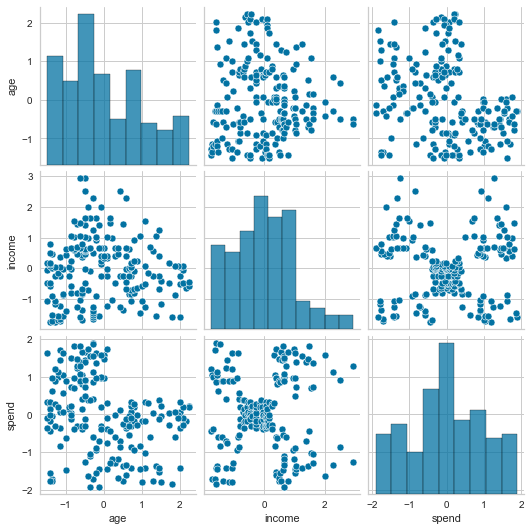

In [95]:
sns.pairplot(tb_mall_std)

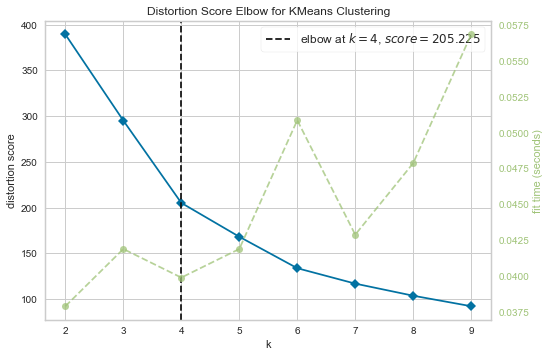

In [96]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(tb_mall_std)
visualizer.show();

In [97]:
from scipy.cluster.hierarchy import dendrogram, linkage

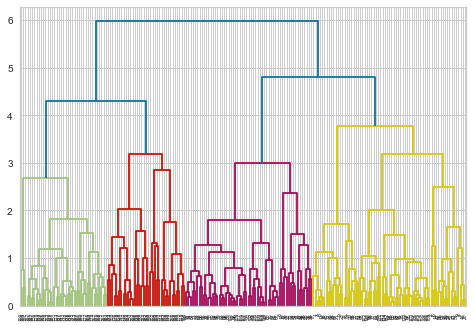

In [98]:
dendrogram_ = dendrogram(linkage(tb_mall_std, method = 'complete'))

In [101]:
from sklearn.cluster import AgglomerativeClustering
hierarchical = AgglomerativeClustering(n_clusters = 4, affinity='euclidean', linkage='complete')
hierarchical.fit(tb_mall_std)
tb_mall['clu_ward'] = [str(x) for x in hierarchical.labels_]

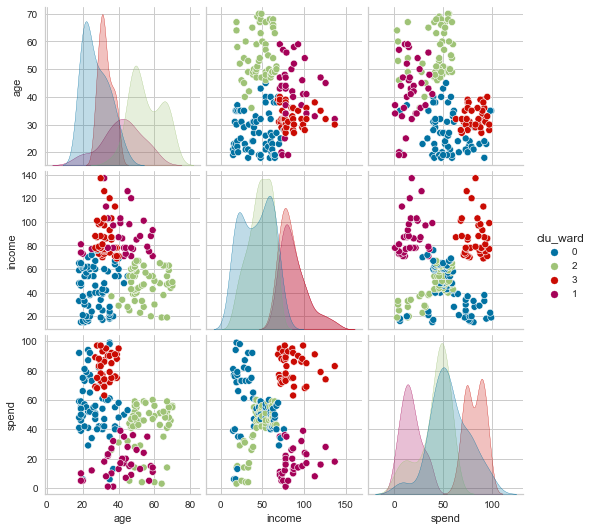

In [102]:
sns.pairplot(tb_mall, vars = ['age', 'income', 'spend'], hue = 'clu_ward')

### DBSCAN

In [106]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
X, y = make_moons(200, noise=.05, random_state=0)

<AxesSubplot:xlabel='X1', ylabel='X2'>

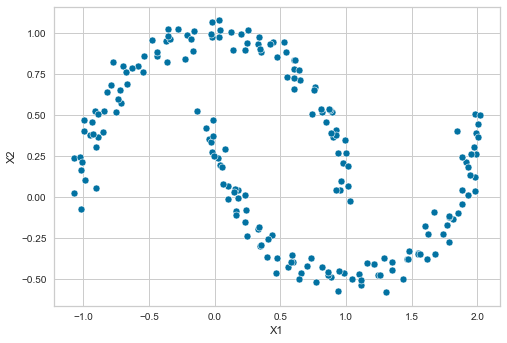

In [104]:
tb_moon = pd.DataFrame(X, columns = ['X1', 'X2'])
sns.scatterplot(data=tb_moon, x = 'X1', y = 'X2')

In [113]:
db = DBSCAN(eps=0.5, min_samples=10)
tb_moon['clu_dbscan'] = db.fit_predict(X)

<AxesSubplot:xlabel='X1', ylabel='X2'>

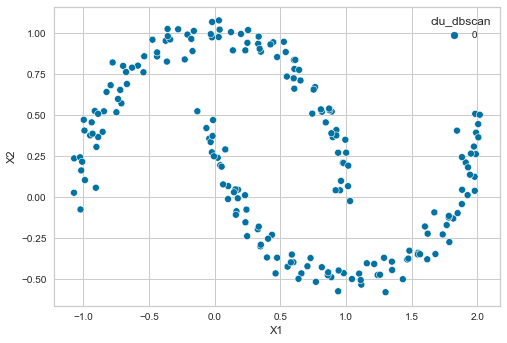

In [114]:
sns.scatterplot(data=tb_moon, x = 'X1', y = 'X2', hue = 'clu_dbscan')

In [119]:
import random
def escolher_aleatório(set_alunos):
    escolhido = random.choice(set_alunos)
    set_alunos.remove(escolhido)
    print(escolhido)
    
alunos = ['andre', 'andres']

In [120]:
escolher_aleatório(alunos)

andres
